<a href="https://colab.research.google.com/github/datalover2023/Module_4/blob/main/Budget_UseCase_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import os
import glob
import shutil
import sys
from pathlib import Path

import datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from openpyxl import load_workbook # necesserry library

# utility functions for cells locations
!pip install xlsxwriter  # uncomment if necessary
import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from xlsxwriter.utility import xl_col_to_name
from xlsxwriter.utility import xl_range, xl_range_abs
from openpyxl.utils import get_column_letter, column_index_from_string


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 11.7 MB/s eta 0:00:00


In [2]:
# set visible all columns
pd.set_option('display.max_columns', None)

# 1.&nbsp;Settings

## Drive and cwd

In [3]:
# Accessing Google Drive from Google Colab

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# assing current working directory (`cwd`)
cwd = os.getcwd()
cwd

'/content'

In [5]:
# containing of /content directory
os.listdir()

['.config', 'gdrive', 'sample_data']

## Import Files

In [6]:
# import files into google Colab
from google.colab import files

In [7]:
# upload from your local : images .png from your downloads
uploaded = files.upload()

Saving img_1.PNG to img_1.PNG
Saving img_2.PNG to img_2.PNG
Saving img_3.PNG to img_3.PNG
Saving img_4.PNG to img_4.PNG
Saving img_5.PNG to img_5.PNG
Saving img_6.PNG to img_6.PNG
Saving img_7.PNG to img_7.PNG
Saving img_8.PNG to img_8.PNG
Saving img_9.PNG to img_9.PNG
Saving img_10.PNG to img_10.PNG
Saving img_11.PNG to img_11.PNG


In [8]:
# containing of /content directory, see if images were uploaded
os.listdir()

['.config',
 'img_4.PNG',
 'img_5.PNG',
 'img_8.PNG',
 'img_9.PNG',
 'img_6.PNG',
 'img_10.PNG',
 'gdrive',
 'img_11.PNG',
 'img_2.PNG',
 'img_1.PNG',
 'img_3.PNG',
 'img_7.PNG',
 'sample_data']

## Module_4 folder

In [10]:
# uncoment if you want to reinitilize Module_4

# delete folder Model_4 with all containing
# shutil.rmtree('/content/gdrive/MyDrive/Module_4')

In [11]:
# create a floder Module_4 where you'll store files

# create a new folder called "Module_4"

# First: 
# write the path to the "Module_4" sub_directory
folder = cwd + '/' + 'gdrive/MyDrive/Module_4/images' # == > /content/gdrive/MyDrive/Module_4/images
print(folder)

# Second:
# create the folder at the indicated path
os.makedirs(folder) # create an empty folder, if you're getting an error [Errno 17] File exists, then delete it with shutil.rmtree


/content/gdrive/MyDrive/Module_4/images


In [12]:
# check files in Module_4 directory
os.listdir('/content/gdrive/MyDrive/Module_4')

['images']

In [13]:
# containing of folder images
os.listdir('/content/gdrive/MyDrive/Module_4/images')

[]

In [14]:
# select all .png and move them to folder Module_3/Images

# searchin for all files with extention .png
# and store the into a list png_files

png_files=[]
for file in os.listdir():
    if file.endswith('.PNG'): # or '.csv' if your'looinkg for csv files
            png_files.append(file)
            
# it will print out excel names present in current directory folder = 'Basics_Python"
print( 'there are', len(png_files), "png files ")
print(png_files[:4])

there are 11 png files 
['img_4.PNG', 'img_5.PNG', 'img_8.PNG', 'img_9.PNG']


In [15]:
# move all images into folder MOdule_4/Images

folder = '/content/gdrive/MyDrive/Module_4/images'

for image in png_files:
  shutil.move(image, # file/folder to cut
              folder) # folder where to move 

In [16]:
# check if images were moved from cwd
os.listdir()

['.config', 'gdrive', 'sample_data']

In [17]:
# check files in Module_4
os.listdir('gdrive/MyDrive/Module_4')

['images']

In [18]:
# check files present in Module_4/Images, all the images were transfered to Module_4/images
os.listdir('/content/gdrive/MyDrive/Module_4/images')

['img_4.PNG',
 'img_5.PNG',
 'img_8.PNG',
 'img_9.PNG',
 'img_6.PNG',
 'img_10.PNG',
 'img_11.PNG',
 'img_2.PNG',
 'img_1.PNG',
 'img_3.PNG',
 'img_7.PNG']

In [19]:
# change cwd to Module_4
os.chdir('gdrive/MyDrive/Module_4')
# check the new current working directory now
cwd = os.getcwd()
cwd # folder MOdule_3 will be from now on our cwd

'/content/gdrive/MyDrive/Module_4'

In [20]:
# upload from your local : 'Budget_raw.xlsx'
uploaded = files.upload()

Saving Budget_raw.xlsx to Budget_raw.xlsx


In [21]:
# check if Budget_raw.xlsx is on cwd ==> Module_4
os.listdir()

['images', 'Budget_raw.xlsx']

In [28]:
# check the notebook in your Colab Notebooks

# if you want to delete a specific notebook in your drive, uncomment
# os.unlink('/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb')

# check again the files in Colab Notebooks
os.listdir('/content/gdrive/MyDrive/Colab Notebooks')

['Copy of Budget_UseCase_Module_4.ipynb']

In [30]:
# if you save it in Drive and it was saved as a copy then rename it 

# rename

'''

os.rename('/content/gdrive/MyDrive/Colab Notebooks/Copy of Budget_UseCase_Module_4.ipynb', 
          '/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb') 
          
'''

# check again the files in Colab Notebooks
os.listdir('/content/gdrive/MyDrive/Colab Notebooks')

['Budget_UseCase_Module_4.ipynb']

In [31]:
# check if you have the latest version of notebook
# get the time of file creation/modification

import time
 
# Path to the file/directory
path = "/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb"
# path = "Budget_UseCase_Module_4.ipynb" # from cwd
 
# Both the variables would contain time

ti_c = os.path.getctime(path) # time of creation
ti_m = os.path.getmtime(path) # time of modification


# Converting the time in seconds to a timestamp
c_ti = time.ctime(ti_c)
m_ti = time.ctime(ti_m)
 
print(f"The file located at the path {path} \
was created at {c_ti} and was "
      f"last modified at {m_ti}")

The file located at the path /content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb was created at Thu Mar  9 13:09:37 2023 and was last modified at Thu Mar  9 13:09:37 2023


In [32]:
# copy notebook "Excel_processing_Basics_Colab_Module_4" in your cwd MOdule_4

folder = '/content/gdrive/MyDrive/Module_4' # path to were to move
notebook = '/content/gdrive/MyDrive/Colab Notebooks/Budget_UseCase_Module_4.ipynb' # path from the where to get the notebook

# copy (or move) from google colab to module_4, if you like to move ==> .move
shutil.copy(notebook, # file/folder to cut/copy
            folder) # folder where to move

'/content/gdrive/MyDrive/Module_4/Budget_UseCase_Module_4.ipynb'

In [33]:
#containing of cwd
os.listdir()

['images', 'Budget_raw.xlsx', 'Budget_UseCase_Module_4.ipynb']

In paralel, 



*   we will be working with *pandas* : for data operations, like summing, % change, group by... 
*   we will be working with *openpyxl* to write the modifications in excel: inserting/writing new columns at locations we want



# 2.&nbsp;DF pandas, read Excel

## Loading excel in DF

In [34]:
# read excel 'Budget_raw.xlsx' and load it in a dataframe

filename='Budget_raw.xlsx'
# read the excel
df = pd.read_excel(filename, 
                   header=0) # the row 0 will be as our headers
df = pd.DataFrame(df)
# df = df.set_index(['Region', 'Business', 'Department'])

# display first 8 rows
df.head(8)

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71
5,B2C_1,Loans,AT,5867.90,7334.88,6102.62,4987.72,6043.94,6396.01,2229.34,2162.46,2551.70,2908.94,3112.57,3237.07
6,B2C_1,Loans,AT,5824.70,6814.90,6989.64,4543.27,6465.42,5649.96,2199.00,1737.21,2015.16,2115.92,1883.17,1977.33
7,B2C_1,Loans,AT,5924.95,5391.70,4976.96,7346.94,6102.70,5806.45,3924.12,3767.16,4068.53,3987.16,4505.49,3964.83


## Explore the DF

In [35]:
# dimensions and column names

print('df dimensions: ', df.shape)
print('df lengh: ', len(df))
print('df columns: ', df.columns)

df dimensions:  (1937, 15)
df lengh:  1937
df columns:  Index(['Business', 'Department', 'Region', 'Jan Income', 'Feb Income',
       'Mar Income', 'Apr Income', 'May Income', 'Jun Income',
       'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure',
       'Apr Expenditure', 'May Expenditure', 'Jun Expenditure'],
      dtype='object')


In [36]:
# check data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Business         1937 non-null   object 
 1   Department       1937 non-null   object 
 2   Region           1937 non-null   object 
 3   Jan Income       1937 non-null   float64
 4   Feb Income       1937 non-null   float64
 5   Mar Income       1937 non-null   float64
 6   Apr Income       1937 non-null   float64
 7   May Income       1937 non-null   float64
 8   Jun Income       1937 non-null   float64
 9   Jan Expenditure  1937 non-null   float64
 10  Feb Expenditure  1937 non-null   float64
 11  Mar Expenditure  1937 non-null   float64
 12  Apr Expenditure  1937 non-null   float64
 13  May Expenditure  1937 non-null   float64
 14  Jun Expenditure  1937 non-null   float64
dtypes: float64(12), object(3)
memory usage: 227.1+ KB


In [37]:
# how many Business categories

df['Business'].unique()

array(['B2C_1', 'B2B', 'Fleet', 'B2C_2'], dtype=object)

In [38]:
# how many Departmens categories

df['Department'].unique()

array(['Loans', 'Services', 'Assistance', 'Maintenance', 'Fees'],
      dtype=object)

In [39]:
# how many Regions categories

df['Region'].unique()

array(['AT', 'BE', 'DE', 'DK', 'FR', 'IE', 'IT', 'NL', 'PL', 'PT', 'UK'],
      dtype=object)

# 3.&nbsp;Excel workbook

## Load in workbook

In [40]:
# load a workbook in wb var
# be carefull, the excel file should be closed on your computer in order to access it

# load Budget_raw.xlsx workbook
filename = 'Budget_raw.xlsx'
wb = load_workbook(filename= filename, #relative path
                   #read_only=True, # optimised for reading, content cannot be edited
                   data_only =True) # controls whether cells with formulae have either the formula (default) or the value stored the last time Excel read the sheet

In [41]:
# get sheetnames of the workbook
wb.sheetnames

['Data', 'Department']

We can explore/ add some metadata about the excel, like : author, description, some keywords...

In [42]:
# Metadata => information about your excel
wb.properties

<openpyxl.packaging.core.DocumentProperties object>
Parameters:
creator=None, title=None, description=None, subject=None, identifier=None, language=None, created=datetime.datetime(2017, 6, 9, 0, 53, 13), modified=datetime.datetime(2022, 11, 21, 13, 49), lastModifiedBy=None, category=None, contentStatus=None, version=None, revision=None, keywords=None, lastPrinted=None

In [43]:
# add some metadata about the excel

wb.properties.title  = 'Budget_Processed Excel Automation'
wb.properties.creator  = 'Cristina Teleuca'
wb.properties.description  = 'Excel Manipulation with Python openpyxl' 
wb.properties.keywords  = ['Excel', 'Automation', 'Python', 'openpyxl']
wb.properties.created = datetime.datetime(2023, 2, 1, 8, 00, 00)
wb.properties.modified = datetime.datetime.now()

wb.properties

<openpyxl.packaging.core.DocumentProperties object>
Parameters:
creator='Cristina Teleuca', title='Budget_Processed Excel Automation', description='Excel Manipulation with Python openpyxl', subject=None, identifier=None, language=None, created=datetime.datetime(2023, 2, 1, 8, 0), modified=datetime.datetime(2023, 3, 9, 13, 14, 30, 587793), lastModifiedBy=None, category=None, contentStatus=None, version=None, revision=None, keywords="['Excel', 'Automation', 'Python', 'openpyxl']", lastPrinted=None

In [44]:
# assign sheet for sheetname 'Data' the sheet we'll work with
sheet = wb['Data']
sheet.title

'Data'

In [45]:
# get nb of rows of a sheet
print(sheet.max_row)

# get nb of columns of a sheet
print(sheet.max_column)

1938
15


In [46]:
# save the workbook into another excel "Budget_processed.xlsx" 
wb.save('Budget_processed.xlsx') # just to have 2 versions: the original one and the processed one with modifications
# check if the new excel file was created
os.listdir()

['images',
 'Budget_raw.xlsx',
 'Budget_UseCase_Module_4.ipynb',
 'Budget_processed.xlsx']

# 4.&nbsp;Excel exploration/ Dimensions/ Locations




## XL range

Compute df_range with xl_range()

The xl_range() function converts zero based row and column cell references to an A1:B1 style range string

In [47]:
# compute the range of the whole dataframe 
max_row, max_col = df.shape
print('df shape: ', max_row, max_col) 

# the df range in excel (A1:O1938)
ws_range = xl_range(0, # starting row
                    0, # starting column
                    max_row, # last row index # 1937
                    max_col - 1) # 15-1 ==>  last column -1 as the index starts a 0
print('in excel the df cellrange is : ', ws_range) # !!!! don't forget to update df_range if you're adding new col or rows

df shape:  1937 15
in excel the df cellrange is :  A1:O1938


In [48]:
# Access all cells from A1 to 05
for idx, row in enumerate(sheet['A1:O5']):
    print(idx+1, [x.value for x in row])

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46]
4 ['B2C_1', 'Loans', 'AT', 5924.95, 7406.19, 6043.45, 6161.95, 6161.95, 5924.95, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31]
5 ['B2C_1', 'Services', 'AT', 5924.95, 5865.7, 7406.19, 4858.46, 5984.2, 7169.19, 4840.73, 4743.92, 5692.7, 5123.43, 4867.26, 5500]


In [50]:
# let's create a dictionnary where we'll store dimensions/locations of our excel

ws_loc = {'max_row': max_row,
          'max_col': max_col,
          'df_shape': df.shape,
          'ws_range': ws_range    
         }

ws_loc               

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938'}

## Upper left corner

In [51]:
# start indices
start_point = xl_rowcol_to_cell(0,0) # coordinates of top lef of df
start_col = xl_col_to_name(0)# # get the column letter for first column
print("start point:", start_point,     
      "start col:", start_col)

start point: A1 start col: A


In [52]:
# add them to the ws_loc

ws_loc['start_point']= start_point
ws_loc['start_col']= start_col
ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A'}

## Lower right corner

In [53]:
# end indices
end_point = xl_rowcol_to_cell(max_row, max_col-1) # # coordinates of bottom right of df
end_col = xl_col_to_name(max_col-1) # get the column letter for the last column
end_row = max_row + 1 # last row in excel (+1)
# get the index nb of column O
end_col_idx = column_index_from_string(end_col)

In [54]:
# add them to the ws_loc

ws_loc['end_point']= end_point
ws_loc['end_col']= end_col
ws_loc['end_col_idx']= end_col_idx
ws_loc['end_row']= end_row

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938}

## Columns

Iterate through columns to get a better feeling of columns names and their respective indices

In [55]:
# read all values from 1st row
print('nb of rows: ' , sheet.max_row)
print('nb of columns: ' , sheet.max_column)
print('')

print('column indices and names: ... ')
print('')

# iterate the 1st row values of the sheet, to see the col nb in excel and it's name
for i in range(1, sheet.max_column+1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=1, column=i)
    print(ref.column, ref.value)

nb of rows:  1938
nb of columns:  15

column indices and names: ... 

1 Business
2 Department
3 Region
4 Jan Income
5 Feb Income
6 Mar Income
7 Apr Income
8 May Income
9 Jun Income
10 Jan Expenditure
11 Feb Expenditure
12 Mar Expenditure
13 Apr Expenditure
14 May Expenditure
15 Jun Expenditure


In [56]:
# iterate the 1 Column values of the sheet of the sheet up tp 10th row
for i in range(1, 10 + 1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=i, column=1)
    print(ref.column, ref.value)

1 Business
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1
1 B2C_1


In [57]:
# iterate the 2nd Column values of the sheet of the sheet up tp 10th row
for i in range(1, 10 + 1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=i, column=2)
    print(ref.column, ref.value)

2 Department
2 Loans
2 Loans
2 Loans
2 Services
2 Loans
2 Loans
2 Loans
2 Loans
2 Loans


In [58]:
# iterate the last_column values of the sheet up tp 10th row
last_column = sheet.max_column

for i in range(1, 10 + 1): # add + 1, as the range function 2nd argument is not inclusive
    ref = sheet.cell(row=i, column=last_column)
    print(ref.column, ref.value)

15 Jun Expenditure
15 4217.15
15 5064.46
15 3229.31
15 5500
15 8481.71
15 3237.07
15 1977.33
15 3964.83
15 2583


# 5.&nbsp;Add columns: Income, Expenditure, Net

We want to add 3 columns to our df:

1.   **Total Income** (sum of all months with Income: from Jan to June)
2.   **Total Expenditure** (sum of all months with Expenditure: from Jan to June)
3.   **Net** (Net revenue = Total Income - Total Expenditure)
4. We we'll need to update ws_locations because of modifications



## Total Income 

**"Total Income" column in DF with pandas**

Because, we want to do it automatically...

1.   Identify columns that concerns the Income
2.   Sum all Income columns
3.   Reorder columns, so Total Income will be after last month with 
4. Add header Total Income



**1.**   Identify columns that have the string Income in it

In [59]:
# how to find a substring in a string

fullstring = "StackAbuse"
substring = "tack"

if substring in fullstring:
    print("Found!")
else:
    print("Not found!")

Found!


In [60]:
## create an empty lis where we'll store column names that heve the string "Income" in it
income_col=[]

## iterate through column indices
for col in range(0, len(df.columns)):
    if 'Income' in df.columns[col]: #  identify column index for column with Income
        income_col.append(col) # if column is identify store its index in the income_col list

# the indices of columns that have sustring Income in it
print('columns with Income:', income_col) # the list with column indices that have Income in columns

columns with Income: [3, 4, 5, 6, 7, 8]


In [61]:
# limits of Income interval
# assign variables with the start column index and the end column index
income_start= income_col[0] # 1st element in the list ==> 3
income_end= income_col[-1] # last element in the list ==> 8

# the 1st and the last col that have Income in it
print('first:', income_start, 'last:', income_end)

first: 3 last: 8


In [62]:
# add them to ws_locations

ws_loc['income_col']=income_col
ws_loc['income_start']=income_start
ws_loc['income_end']=income_end

ws_loc


{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8}

In [63]:
# check those columns at found indices in df with .iloc
df.iloc[:, income_start:income_end+1] # we need to add +1 to income_end as the upper limit is not included,
# .... and we want to make sure the last col is included (Jun)

,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income
0,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96
1,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69
2,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95
3,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19
4,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20
...,...,...,...,...,...,...
1932,562.75,512.10,664.05,478.34,619.03,472.71
1933,5924.95,6991.44,7169.19,4443.71,4858.46,7406.19
1934,480.00,393.60,470.40,412.80,384.00,600.00
1935,400.00,464.00,448.00,424.00,420.00,384.00


**2.**   Compute Total Income 

In [64]:
# 2.compute the total income and assign it in a new column in the df
# and add a new column 'Total Income' that will store the some of columns

df['Total Income'] = df.iloc[:, income_start:income_end+1].sum(axis=1) # axis=1 is  the column axis
df.head() #the column 'Total Income' was added at the the end

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Income
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,37801.19
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,37741.93
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,37623.44
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,37208.69
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,36971.70


**3.** Order Columns

In [65]:
# We want to add the Total Income after the last month of Incoms

print('we want to add it after col:', income_end)

we want to add it after col: 8


In [66]:
# order: we want to order columns so Total Income would follow the Income columns
# cut and insert the column after all Income months columns

df.insert(income_end + 1, # at what index to insesrt
          'Total Income', # Label of the inserted column.
          df.pop('Total Income')) # will return the column Total Income and will drop it from DF's end

df.head() # now Total income disapeared from the end of df, and was inserted after col 8, and has index 9

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71


In [67]:
# update ws_loc
ws_loc['total_inc_df']= income_end + 1

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9}

In [68]:
# find column number of column Jan Income in Excel
for i in range(1, sheet.max_column):
    ref = sheet.cell(row=1, column=i)
    if ref.value == 'Jan Income':
        print('in EXCEL the column nb for Jan Income is: ', ref.column)

in EXCEL the column nb for Jan Income is:  4


In [69]:
# find column number that have Income months

income_col_xl = []
for i in range(1, sheet.max_column):# because we're in excel the index starts at 1
    ref = sheet.cell(row=1, column=i)
    if 'Income' in ref.value:
        income_col_xl.append(ref.column)

print(income_col_xl)

[4, 5, 6, 7, 8, 9]


In [70]:
# compute the index where to insert a column for Total Income in excel
total_inc_col = income_col_xl[-1] + 1
# we would like to insert the column Total Income at column 10
print(total_inc_col)

10


In [71]:
# update ws_loc

ws_loc['income_col_xl']= income_col_xl
ws_loc['income_Total_col_xl']= total_inc_col

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10}

In [72]:
# insert column at this index
sheet.insert_cols(idx= total_inc_col, # column location
                  amount=1) # how many columns to insert


wb.save('Budget_processed.xlsx') 

In [73]:
# write values ot Total Income computed with pandas in df, at the column we just inserted

# save the column 'Total Income' from df computed with pandas in list cellrange

cellrange = df['Total Income']

# the column index (in excel) where we want to write
print('write in Excel the values of Total Income in column:', total_inc_col)

# starting row 2
row= 2# because the row_1 are the headers

# write the elements from cellrange in excel at index total_inc_col
for i in range(0, len(cellrange)):
    sheet.cell(row=row, column = total_inc_col).value= cellrange[i]
    row=row+1

# save the modifications
wb.save('Budget_processed.xlsx')

write in Excel the values of Total Income in column: 10


In [74]:
# in updated excel, we inserted + wrote values for Total Income (after June Income)

for idx, row in enumerate(sheet['A1:K5']):
    print(idx+1, [x.value for x in row]) 

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', None, 'Jan Expenditure']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 37801.189999999995, 5178.13]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 37741.93, 3913.87]
4 ['B2C_1', 'Loans', 'AT', 5924.95, 7406.19, 6043.45, 6161.95, 6161.95, 5924.95, 37623.44, 4386.71]
5 ['B2C_1', 'Services', 'AT', 5924.95, 5865.7, 7406.19, 4858.46, 5984.2, 7169.19, 37208.69, 4840.73]


4. Add header Total Income

In [75]:
# now we want to write the header 'Total Income' in the excel
# for this:

# 1st we need to compute the location of this header

# write column name for Total expenditure as a header
# compute this location...
total_inc_col_letter = get_column_letter(total_inc_col)
total_inc_row = 1
total_inc_cel_ref = str(total_inc_col_letter) + str(total_inc_row)
print('the cel ref for Total Income header: ', total_inc_cel_ref)

the cel ref for Total Income header:  J1


In [76]:
# 2nd, write the string/header Total Income in Excel
# write it in excel 
sheet[total_inc_cel_ref]= 'Total Income'
#save modification
wb.save('Budget_processed.xlsx') 

# now our excel look like this:

for idx, row in enumerate(sheet['A1:K3']):
    print(idx+1, [x.value for x in row])

1 ['Business', 'Department', 'Region', 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income', 'Total Income', 'Jan Expenditure']
2 ['B2C_1', 'Loans', 'AT', 5924.95, 4680.71, 7406.19, 7169.19, 7406.19, 5213.96, 37801.189999999995, 5178.13]
3 ['B2C_1', 'Loans', 'AT', 5924.95, 7346.94, 6872.94, 4739.96, 6280.45, 6576.69, 37741.93, 3913.87]


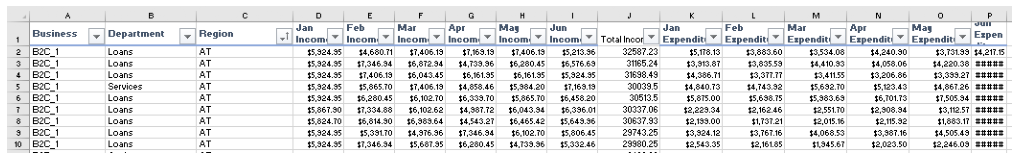

In [77]:
# display image
img = mpimg.imread('images/img_1.PNG')
plt.rcParams['figure.figsize'] = [18, 16]
plt.imshow(img)

plt.axis('off')
plt.show()

In [78]:
# add column letter Total Income ws_loc
print(total_inc_col_letter)
ws_loc['total_inc_col_letter_xl'] = total_inc_col_letter

J


## Total Expenditure 

Total Expenditure in DF

In [79]:
# first compute total Exp for all months in df

# identify column index for column with Income
expenditure_col=[]
for col in range(0, len(df.columns)):
    if 'Expenditure' in df.columns[col]:
        expenditure_col.append(col)

print('Exp columns: ', expenditure_col)

# 1st col with Exp
expenditure_start= expenditure_col[0]

# last col with Exp
expenditure_end= expenditure_col[-1]

Exp columns:  [10, 11, 12, 13, 14, 15]


In [80]:
#check those columns at found indices 
df.iloc[:, expenditure_start:expenditure_end+1]

,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure
0,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15
1,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46
2,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31
3,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00
4,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71
...,...,...,...,...,...,...
1932,1920.55,1459.62,1328.25,1514.21,1756.48,1651.09
1933,5875.00,5875.00,6756.25,6823.81,5800.24,6612.27
1934,376.19,395.00,462.15,402.07,353.82,350.28
1935,1023.75,993.04,933.46,980.13,891.92,784.89


In [81]:
# compute the total income and assign it in a new column in the df
df['Total Expenditure'] = df.iloc[:, expenditure_start:expenditure_end+1].sum(axis=1)
df.head() #the column was added at the the end

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,24785.85
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,30768.04
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,40246.82


In [82]:
# Total Expenditure column idx in df
total_exp_df = df.columns.get_loc("Total Expenditure")

# Total Expenditure column idx in excel
total_exp_xl = total_exp_df + 1

# Total exp col letter
total_exp_col_letter = get_column_letter(total_exp_xl) 


In [83]:
# update ws_loc

ws_loc['expenditure_col']= expenditure_col
ws_loc['expenditure_start']=expenditure_start
ws_loc['expenditure_end']=expenditure_end
ws_loc['total_exp_df']= total_exp_df
ws_loc['total_exp_xl']= total_exp_xl
ws_loc['total_exp_col_letter']= total_exp_col_letter


ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q'}

In [84]:
# find column number of column Jan Exp
for i in range(1, sheet.max_column):
    ref = sheet.cell(row=1, column=i)
    if ref.value == 'Jan Expenditure':
        print('the column nb for Jan Expenditure is: ', ref.column)

the column nb for Jan Expenditure is:  11


In [85]:
# find column number that have Exp months

expenditure_col_xl = []
for i in range(1, sheet.max_column+1):# without + 1
    ref = sheet.cell(row=1, column=i)
    if 'Expenditure' in ref.value:
        expenditure_col_xl.append(ref.column)

print(expenditure_col_xl)

[11, 12, 13, 14, 15, 16]


In [86]:
expenditure_start_xl= expenditure_col_xl[0]
expenditure_end_xl= expenditure_col_xl[-1]

print('expenditure starts at column: ', get_column_letter(expenditure_start_xl),
      'expenditure end at column: ', get_column_letter(expenditure_end_xl))

expenditure starts at column:  K expenditure end at column:  P


In [87]:
# update ws_loc

ws_loc['expenditure_col_xl']= expenditure_col_xl
ws_loc['expenditure_start_xl']=expenditure_start_xl
ws_loc['expenditure_end_xl']=expenditure_end_xl

ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q',
 'expenditure_col_xl': [11, 12, 13, 14, 15, 16],
 'expenditure_start_xl': 11,
 'expenditure_end_xl': 16}

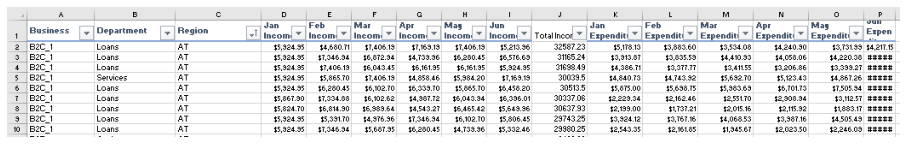

In [88]:
# display image
img = mpimg.imread('images/img_1.PNG')
plt.rcParams['figure.figsize'] = [16, 16]
plt.imshow(img)

plt.axis('off')
plt.show()

In [89]:
# compute idx where to copy/past the total for expenditure
total_exp_col = expenditure_col_xl[-1]+1
total_exp_col

17

In [90]:
cellrange = round(df['Total Expenditure'], 2)
row= 2
for i in range(0, len(cellrange)):
    sheet.cell(row=row, column = total_exp_col).value= cellrange[i]
    row=row+1

wb.save('Budget_processed.xlsx') 

In [91]:
# write column name for Total expenditure
total_exp_col_letter = get_column_letter(total_exp_col)
total_exp_row = 1
total_exp_cel_ref = str(total_exp_col_letter) + str(total_exp_row)
total_exp_cel_ref

'Q1'

In [92]:
sheet[total_exp_cel_ref]= 'Total Expenditure'
wb.save('Budget_processed.xlsx') 

In [93]:
for idx, row in enumerate(sheet['H1:Q5']):
    print(idx+1, [x.value for x in row])

1 ['May Income', 'Jun Income', 'Total Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure', 'Total Expenditure']
2 [7406.19, 5213.96, 37801.189999999995, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15, 24785.85]
3 [6280.45, 6576.69, 37741.93, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46, 25503.29]
4 [6161.95, 5924.95, 37623.44, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31, 21011.47]
5 [5984.2, 7169.19, 37208.69, 4840.73, 4743.92, 5692.7, 5123.43, 4867.26, 5500, 30768.04]


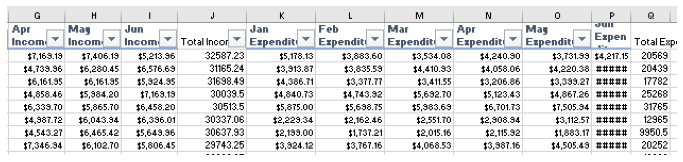

In [94]:
# display image
img = mpimg.imread('images/img_2.PNG')
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(img)
plt.axis('off')
plt.show()

## Net

In [95]:
df.head()

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,24785.85
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,30768.04
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,40246.82


In [96]:
# compute Net column in df
df['Net']= df['Total Income'] - df['Total Expenditure']
df.head()

,Business,Department,Region,Jan Income,Feb Income,Mar Income,Apr Income,May Income,Jun Income,Total Income,Jan Expenditure,Feb Expenditure,Mar Expenditure,Apr Expenditure,May Expenditure,Jun Expenditure,Total Expenditure,Net
0,B2C_1,Loans,AT,5924.95,4680.71,7406.19,7169.19,7406.19,5213.96,37801.19,5178.13,3883.60,3534.08,4240.90,3731.99,4217.15,24785.85,13015.34
1,B2C_1,Loans,AT,5924.95,7346.94,6872.94,4739.96,6280.45,6576.69,37741.93,3913.87,3835.59,4410.93,4058.06,4220.38,5064.46,25503.29,12238.64
2,B2C_1,Loans,AT,5924.95,7406.19,6043.45,6161.95,6161.95,5924.95,37623.44,4386.71,3377.77,3411.55,3206.86,3399.27,3229.31,21011.47,16611.97
3,B2C_1,Services,AT,5924.95,5865.70,7406.19,4858.46,5984.20,7169.19,37208.69,4840.73,4743.92,5692.70,5123.43,4867.26,5500.00,30768.04,6440.65
4,B2C_1,Loans,AT,5924.95,6280.45,6102.70,6339.70,5865.70,6458.20,36971.70,5875.00,5698.75,5983.69,6701.73,7505.94,8481.71,40246.82,-3275.12


In [97]:
# take values for column Net from df
# and put them into a list cellrange

cellrange = list(round(df['Net'], 2))
cellrange[:10]

[13015.34,
 12238.64,
 16611.97,
 6440.65,
 -3275.12,
 20530.99,
 24360.1,
 11332.41,
 21809.25,
 -8271.33]

In [98]:
# insert header 'Net' at index 0 (1st position)
cellrange.insert(0, 'Net')
cellrange[:10]

['Net',
 13015.34,
 12238.64,
 16611.97,
 6440.65,
 -3275.12,
 20530.99,
 24360.1,
 11332.41,
 21809.25]

In [99]:
# Net column idx in df
net_col = df.columns.get_loc("Net")
print(net_col)

17


In [100]:
# Net column idx in excel

net_col_xl = net_col + 1

In [101]:
# add them to ws_loc

ws_loc['net_col_df'] = net_col
ws_loc['net_col_xl'] = net_col_xl
ws_loc['net_col_letter'] = get_column_letter(net_col_xl)

In [102]:
# from row 1
row= 1
# write  cellrange in excel at column net_col

for i in range(0, len(cellrange)):
    sheet.cell(row=row, column = net_col_xl).value= cellrange[i]
    row=row+1

# save
wb.save('Budget_processed.xlsx') 

In [103]:
for idx, row in enumerate(sheet['H1:R5']):
    print(idx+1, [x.value for x in row])

1 ['May Income', 'Jun Income', 'Total Income', 'Jan Expenditure', 'Feb Expenditure', 'Mar Expenditure', 'Apr Expenditure', 'May Expenditure', 'Jun Expenditure', 'Total Expenditure', 'Net']
2 [7406.19, 5213.96, 37801.189999999995, 5178.13, 3883.6, 3534.08, 4240.9, 3731.99, 4217.15, 24785.85, 13015.34]
3 [6280.45, 6576.69, 37741.93, 3913.87, 3835.59, 4410.93, 4058.06, 4220.38, 5064.46, 25503.29, 12238.64]
4 [6161.95, 5924.95, 37623.44, 4386.71, 3377.77, 3411.55, 3206.86, 3399.27, 3229.31, 21011.47, 16611.97]
5 [5984.2, 7169.19, 37208.69, 4840.73, 4743.92, 5692.7, 5123.43, 4867.26, 5500, 30768.04, 6440.65]


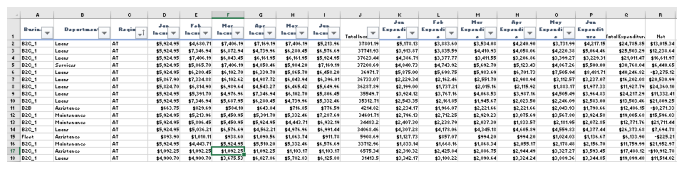

In [104]:
# display image
img = mpimg.imread('images/img_3.PNG')
plt.rcParams['figure.figsize'] = [12, 10]
plt.imshow(img)
plt.axis('off')
plt.show()

In [105]:
# save
wb.save('Budget_processed.xlsx') 


In [106]:
# download file from Drive to your local machine

files.download("Budget_processed.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Update ws_loc after modifications

In [107]:
ws_loc

{'max_row': 1937,
 'max_col': 15,
 'df_shape': (1937, 15),
 'ws_range': 'A1:O1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'O1938',
 'end_col': 'O',
 'end_col_idx': 15,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q',
 'expenditure_col_xl': [11, 12, 13, 14, 15, 16],
 'expenditure_start_xl': 11,
 'expenditure_end_xl': 16,
 'net_col_df': 17,
 'net_col_xl': 18,
 'net_col_letter': 'R'}

In [108]:
# compute the range of the whole dataframe 
max_row, max_col = df.shape

# the df range in excel 
ws_range = xl_range(0, # starting row
                    0, # starting column
                    max_row, 
                    max_col - 1)                 

# end indices
end_point = xl_rowcol_to_cell(max_row, max_col-1) # # coordinates of bottom right of df
end_col = xl_col_to_name(max_col-1) # get the column letter for the last column
end_col_idx = column_index_from_string(end_col)

In [109]:
ws_loc['max_col']= max_col
ws_loc['df_shape'] = df.shape
ws_loc['ws_range'] = ws_range
ws_loc['end_point'] = end_point
ws_loc['end_col'] = end_col
ws_loc['end_col_idx'] = end_col_idx

ws_loc

{'max_row': 1937,
 'max_col': 18,
 'df_shape': (1937, 18),
 'ws_range': 'A1:R1938',
 'start_point': 'A1',
 'start_col': 'A',
 'end_point': 'R1938',
 'end_col': 'R',
 'end_col_idx': 18,
 'end_row': 1938,
 'income_col': [3, 4, 5, 6, 7, 8],
 'income_start': 3,
 'income_end': 8,
 'total_inc_df': 9,
 'income_col_xl': [4, 5, 6, 7, 8, 9],
 'income_Total_col_xl': 10,
 'total_inc_col_letter_xl': 'J',
 'expenditure_col': [10, 11, 12, 13, 14, 15],
 'expenditure_start': 10,
 'expenditure_end': 15,
 'total_exp_df': 16,
 'total_exp_xl': 17,
 'total_exp_col_letter': 'Q',
 'expenditure_col_xl': [11, 12, 13, 14, 15, 16],
 'expenditure_start_xl': 11,
 'expenditure_end_xl': 16,
 'net_col_df': 17,
 'net_col_xl': 18,
 'net_col_letter': 'R'}

# 6.&nbsp;Overview

The OVERVIEW df will contain:

1.  Row with months, by Income + 'Total' and Expenditure +  'Total'
2.  Row with headers, wether it's Income or Exp
3.  Rows l(4) for every **Business** (B2B, B2C1, B2C_2, Fleet) with totals for every month for Income and Expenditure + total of totals for Income and Expenditure
4.  Row Monthly Total (Totals by month, accros all businesses), by Inc and Exp
5.  Row with M2M evolution ( % evolution from month to month,  by Income and Expenditure
6.  Row with a cell values of Previous Month Total for Inc and Exp + cells with string Prior
7.  strings in the 1st column: Month, Motnhly total, M2M evoltion, each Business category
8.  Insert the overview part in the sheet 'Data' at the top of the sheet


In [ ]:
# overview part
img = mpimg.imread('images/img_4.PNG')
plt.rcParams['figure.figsize'] = [18, 14]
plt.imshow(img)

plt.axis('off')
plt.show()

In [ ]:
# orange:  for header + month+ TOTAL
# yellow: totals by month for each business
# red:  totals by monhtù + total across businesses
# blue: M2M ev ==> % change
# purple+ green : eaders for rows

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# check the workbook sheet
print(wb.sheetnames)

In [ ]:
# remove the sheet
#rm = wb['Overview']
#wb.remove(rm)

In [ ]:
# create sheet 'Overview'

wb.create_sheet(title='Overview')

overview= wb['Overview'] # create reference to the sheet# delete a sheet

# check the workbook sheet
print(wb.sheetnames)

# save the new workbook 
wb.save('Budget_processed.xlsx')

In [ ]:
# identify column index for column with Income
months=[]
for month in df.columns:
    if 'Income' in month:
        months.append(month)
print(months) # you can inspect all variables created to this point
# by clicking icon Variables {x} in the Table of contents section

In [ ]:
# map function allows to apply a function in an iteration

def myfunc(a):
  return len(a)

x = map(myfunc, ('apple', 'banana', 'cherry'))

print(x) # the output will be a map object

# convert the map into a list, for readability:
print(list(x))

In [ ]:
# remove the substring ' Income' from the list items "months"
# then "map" them with months ==> apply the removing of 'Income' to the list <months>
# convert it to a list

months = list(map(lambda x: x.replace(' Income',''), months)) # map function allows to apply a function in an iteration
print('nb of months: ', len(months))

# save in variable nb_months the nb of monthe
nb_months = len(months)

print('')
print('We will have the same months for in our Data for INcome, and Expenditure as well')
months


## 6.2&nbsp;Headers Income or Expenditure

In [ ]:
# create a list where the string "INCOME" will be repeated 7 times
# we multiply ['INCOME'] by the length of months (here 7) 

list_income= ['INCOME']* (nb_months) # create a list that will contain the string Income x nb_months times
print(len(list_income))
list_income

In [ ]:
# we'll do a nested list "list_inc_2" that will contain both lists:
# list_income AND months + Total

list_inc_2 = [list_income, months]
print(len(list_inc_2[0])) # each sub_list will have 7 elements
print(list_inc_2)

In [ ]:
list_expenditure= ['Expenditure']*(nb_months)
list_exp_2 = [list_expenditure, months]
print(len(list_exp_2[0])) # each sub_list will have 7 elements
print(list_exp_2)

In [ ]:
# example of zip() function
languages = ['Expenditure', 'Expenditure']
versions = ['Jan', 'Feb']

result = zip(languages, versions)
print(list(result))

In [ ]:
# combine 2 nested lists list_inc_2 and list_exp_2
# and put it in a list

# the output of a zip is a tuple
# but as we put it in a list..
# the final output here will be a list, containing 2 tuples, each tuple containing 2 lists:...
#  ...headers 'Income' and months + Total and headers Expenditure and months + Total
list(zip(list_inc_2, list_exp_2))

In [ ]:
# let's do the same with list_inc_2, list_exp_2
# but will modify a little bit, so in final we'll have lists and not tuples
# and also we will flatten/ merge to obtain a single list by tuple
# finally we will obtain a nested list inc_exp

inc_exp = [a + b for a, b in zip(list_inc_2, list_exp_2)]
inc_exp #the final output a nested list, containing 2 sublist: ...
# ...all headers INcome + Exp and all month + Total respectively

In [ ]:
# compute dimensions of the nested list

for subl in inc_exp:
  print(subl)

# how many itmes in nested list
maxr = len(inc_exp) # the lenght of the nested list 

# how many subitmes in each sublist within the nested list
maxc = len(inc_exp[0]) # the lenght of sublist in the nested list

print('')
print('dimensions of our nested list inc_exp: ... ')
print(maxr , maxc)

In [ ]:
# write this nested list to excel, in the sheet overview by iteration

# iterate each rows
for this_row in range (1, maxr + 1):# add + 1, beacause we want to include the upper limit
    # for each row, iterate through each col 
    for this_column in range (1, maxc + 1): # add + 1, beacause we want to include the upper limit
        #print(this_row) ==> at the first iteration will have the row 1
        #print(this_column) => while the iteration of the 1st row will not be finisshed, we will iterate through columns, that will change incrementally
        cellsource = inc_exp[this_row-1][this_column-1] # in the nested list <<inc_exp>> get the right indices (so in 1st iteration: inc_exp[0][0]....
                                                       #  then this indices will increment [0][1] => [0][2] => ... [1][0], [1][1]...)   
                                                       # so the var <<cellsource>> will get dynamically the values of inc_exp at respective indices
        overview.cell(row = this_row+1, column = this_column+1).value = cellsource # then write this value in the ws "overview" at cell ref(row= +1, column= + 1)
        # we're adding +1 for rows and cols because we want to leave space for 'Prior Month' row
        # and + 1 for row, because we want to leave some space in the 1st col, where we will add some rowheaders later

# see what was written
for idx,row in enumerate(overview["A1:O3"]):
    print (idx+1, [x.value for x in row])

In [ ]:
# we have added first 2 rows (headers Income + Exp and Months + Total) for the Overview part
# row nb 2, col B

img = mpimg.imread('images/img_5.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# save the new workbook 
wb.save('Budget_processed.xlsx')

## 6.3&nbsp;Monthly totals by business

In [ ]:
# total by busines type by month (yellow), split afterwards by INCOME and EXP

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# columns name in df

df.columns

In [ ]:
# In df, identify column index for column with Income, without Total

# first all
income_months=[]
for month in df.columns:
    if 'Income' in month:
        income_months.append(month)
print(income_months) # all Incomes


In [ ]:
# remove 'Total Income' from the list
income_months.remove('Total Income')
print(income_months)

In [ ]:
# reminder of df
df.head()

In [ ]:
# Distinct Business categories
df.Business.unique()

In [ ]:
# comute totals by business group for income

# first create a df= business_income where it will group by business for each month

## use groupby method

#### we want to group by criteria Business
#### and all columns that are in list "income_moths"
print('income_months:', income_months)
print('')

### and we want to use the aggregation sum()

print('grouped df by Busines: ...')
business_income = round(df.groupby(['Business'])[income_months].sum(), 2)

# final df of grouping by BUsiness, and suming each month...for INCOME

business_income

In [ ]:
# add a columns where total for all months for income will be computed

## in our df "business_income", add a new column "Total Income"
## "Total Income" will be the sum of col 'Jan Income', 'Feb Income', 'Mar Income', 'Apr Income', 'May Income', 'Jun Income' for each row
business_income['Total Income'] = round(business_income.sum(axis=1), 2) # axis=1 columns
business_income

In [ ]:
# identify column index for column with Income
exp_months=[]
for month in df.columns:
    if 'Expenditure' in month:
        exp_months.append(month)
        
# remove 'Total Income' from the list
exp_months.remove('Total Expenditure')
print(exp_months)

In [ ]:
business_exp = round(df.groupby(['Business'])[exp_months].sum(), 2)
business_exp['Total Expenditure'] = round(business_exp.sum(axis=1), 2)
business_exp

In [ ]:
# join the 2 df, side by side horizontally
business_df = pd.concat([business_income, business_exp], axis=1) #axis=1 ==>columns
business_df

In [ ]:
# we groupby by busines (the yellow part)
# review scrrenshot !!!!
img = mpimg.imread('images/img_6.PNG')
plt.rcParams['figure.figsize'] = [14, 14]
plt.imshow(img)

plt.axis('off')
plt.show()

## 6.4&nbsp;Row Monthly Total

In [ ]:
# MonthlyTotal (red part)
# review scrrenshot !!!!
img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [14, 14]
plt.axis('off')
plt.show()

In [ ]:
business_df.head(3)

In [ ]:
# get all col names in a list

business_col = business_df.columns.to_list()
business_col

In [ ]:
# get Total by Month (in column)

monthly_total = round(business_df[business_col].sum(axis=0), 2)
print(len(monthly_total))
monthly_total

## 6.5&nbsp;M2M evolution

In [ ]:
# M2m evolution (% change from month to month) ==> blue part

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# reminder of our monthly total (red part)
monthly_total

In [ ]:
# make a copy pf monthly_total and save it as ev

ev = monthly_total.copy()

# as we don't want to include in our pct change evo Total Income, and TOtal Exp
# we will assign then None value

ev['Total Income'] = None
ev['Total Expenditure'] = None
ev

In [ ]:
# compute % ev from M2M
ev = round(ev.pct_change(fill_method='ffill'), 4)
print(ev)
# this will return Nan for the 1st item, and there where we had None, the output will be 0

print('')
print('it will compute the evolution in % from month to month ')
print('')
print('pay attention to Total Income, Jan Exp and Total Exp')



In [ ]:
# replace with None

ev['Total Income'] = None
ev['Jan Expenditure'] = None
ev['Total Expenditure'] = None
ev

In [ ]:
# we have computed evolution from month to month, that further (when formating) will be formated as a %
# the blue part

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

## 6.5&nbsp;Previous Month 

In [ ]:
# Previous month lime color

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# compute previous month ....

## find the previous month in the list <<months>>, knowing that 'Total' should be ommitted

print(months)

## if we ommit Total element (that has the index -1) , the last month has the index -2, than the previous month will have the index -3

## save previous month in the variable previou_month
previous_month = months[-3]
previous_month
#months.index(previous_month)

### Income

In [ ]:
business_df

In [ ]:
business_df.columns

In [ ]:
# compute the range uptil the previous month for INCOME

inc_idx= [] # create empty list where we will store indices where we're havine Income
range_end = [] # create empty list where we will save the range_end of these indices

# in the income columns
for idx, col in enumerate(business_df.columns): # iterate df columns with enumaration to get the index and the iterable (col name)
    if 'Income' in col: # if col has 'Income' in it
        inc_idx.append(idx) # then add its index to inc_idx (index start at 0)
        if previous_month in col: # if previous month is in col names
              range_end= idx # then range_end value will be assigned with value of id
                
print("Income starts at index:", min(inc_idx)) # 1st index of column that contain Income
print("index for previous month for Income ",  range_end) # index where we get to previous month
print('')

# list that will contain 2 indices: 1st index for Income, 2nd Index of Income for Previous month
range_prev_inc = [min(inc_idx), range_end]
print(range_prev_inc) # uptil May

In [ ]:
# what we get up to May using the computed indices
business_df.iloc[:, min(inc_idx):range_end+1] # +1 as in range do not include upper limit

In [ ]:
# first sum all columns
# 2nd sum all rows

previous_income = business_df.iloc[:, # all rows
                                   # columns that start at inc_idx (0) and end at range_end+1 (5) ..we add + 1 because upper limit not included
                                   min(inc_idx):range_end+1].sum(axis=1).sum() # sum of columns axis =1 ==> columns axis

# the total Income till the previous month                                  
previous_income

In [ ]:
# Write this value 'Prior' in excel

# first we need to identify the coordinates where to copy the value
# we know that this cell will be above Total Columns (Total Income and TOtal Expenditure)

# Previous month lime color

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# columns nb where we have totals (Income & Expenditure) in overview sheet

total_col = []
# find column number of column that = Total
for i in range(1, overview.max_column+1):# without + 1
    ref = overview.cell(row=3, column=i)
    if ref.value == 'Total':
        total_col.append(ref.column)
        print('the column nb for Total is: ', ref.column)

# indices inf overview sheet where we're having Totals
print(total_col)

In [ ]:
# check the column letter for Previous Totals Income
print('the column where to add Previous Total for INCOME', get_column_letter(total_col[0]))

# check cell ref for value of Previous Total Income
row = 1 # row nb where to paste previous income value
ref = str(get_column_letter(total_col[0])) + str(row) # get the cell ref

print('the cell reference where to add Previous Total for INCOME', ref)

In [ ]:
# write it in Excel using ref
overview[ref] = round(previous_income,2)
overview[ref].value

In [ ]:
# check excel
for idx, row in enumerate(overview):
   print(idx+1, [x.value for x in row])
  

In [ ]:
# add string Prior month next to the value of Previous month of Income

print(total_col) # columns that have Totals
row = 1
ref = str(get_column_letter(total_col[0]-1)) + str(row) # get the ref cel for row 1, and col = element with idx from total_col[0] -1
print(ref)
overview[ref] = 'Prior'
overview[ref].value

In [ ]:
# see what was written
# we have added next to the TOtal of previous month, the string Prior
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])


In [ ]:
# save 
wb.save('Budget_processed.xlsx')  

In [ ]:
# compute the range uptil the previous month for expenditure to sum

inc_idx= []
range_end = []

# in the exp columns
for idx, col in enumerate(business_df.columns):
    if 'Expenditure' in col:
        inc_idx.append(idx)
        if previous_month in col:
              range_end= idx 
                
range_prev_exp = [min(inc_idx), range_end]

# compute all prior exp
previous_exp = business_df.iloc[:, min(inc_idx):range_end+1].sum(axis=1).sum()

# cell ref
row = 1 # row nb where to paste previous income value
ref = str(get_column_letter(total_col[1])) + str(row)

# write it in Excel value
overview[ref] = round(previous_exp,2)


# string Prevous month
ref = str(get_column_letter(total_col[1]-1)) + str(row)  # get the ref cel for row 1, and col = element with idx from total_col[1] -1
overview[ref] = 'Prior'

In [ ]:
# see what was written in excel, overview sheet
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

In [ ]:
wb.save('Budget_processed.xlsx')  

In [ ]:
# in excel all lime (Prior), orange: headers Income& Exp, Months + Total

img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

## 6.6&nbsp;Write Monthly Total, M2M ev, Totals grouped by Business

First, conctenate red (Monthly Total) + blue 5M2M ev) + yellow (total by busines by month df

In [ ]:
# up to ths point our computaions

# red:  totals by month + total across businesses
# blue: ev M2M blue
# yellow: totals by month for each business



img = mpimg.imread('images/img_6.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# Till now we computed in df:

# monthly_total (red part)
print(len(monthly_total))
print( monthly_total[:7])
print('')

# monthly evolution (blue part)
print(len(ev))
print( ev[:7])
print('')

# business_df (yellow part)
print(business_df.shape)
print(business_df.iloc[:, :7])
print('')

In [ ]:
# copy business_df into a temporary df temp
temp = business_df.copy()

# reset index (this will add a new column => Business)
temp = temp.reset_index()

# drop this column 'Business from temp
temp = temp.drop(['Business'], axis=1)

# insert at row 0 Monthly Total
temp = pd.DataFrame(np.insert(temp.values, 0, values=monthly_total, axis=0), columns= temp.columns)

# insert at row 1 Monthly ev
temp = pd.DataFrame(np.insert(temp.values, 1, values=ev, axis=0), columns= temp.columns)

print(temp.shape)

# values that we want to add to overview sheet
temp.values


In [ ]:
# reminder of overview sheet

for idx, row in enumerate(overview):
  print(idx+1, [x.value for x in row])

In [ ]:
# the values of our df temp, is a nested list, each sublist being a row
for subl in temp.values:
  print(subl)


In [ ]:
# how many itmes in nested list
maxr = len(temp.values) # the lenght of the nested list 

# how many subitmes in each sublist within the nested list
maxc = len(temp.values[0]) # the lenght of sublist in the nested list

print('')
print('dimensions of our nested list inc_exp: ... ')
print(maxr , maxc)

In [ ]:
# write this temp.values to  excel, in the sheet overview by iteration

# iterate each rows
for this_row in range (1, maxr + 1):# add + 1, beacause we want to include the upper limit
    # for each row, iterate through each col 
    for this_column in range (1, maxc + 1): # add + 1, beacause we want to include the upper limit
        #print(this_row) ==> at the first iteration will have the row 1
        #print(this_column) => while the iteration of the 1st row will not be finisshed, we will iterate through columns, that will change incrementally
        cellsource = temp.values[this_row-1][this_column-1] # in the temp.values get the right indices (so in 1st iteration: temp[0][0]....
                                                       #  then this indices will increment [0][1] => [0][2] => ... [1][0], [1][1]...)   
                                                       # so the var <<cellsource>> will get dynamically the values of temp.values at respective indices
        overview.cell(row = this_row+3, column = this_column+1).value = cellsource # then write this value in the ws "overview" at cell ref(row= +3, column= + 1)
        # we're adding +3 for rows and cols because we want to write the values starting row 4
        # and + 1 for col, because we want to leave some space in the 1st col, where we will add some rowheaders later



In [ ]:
# see what was written
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

In [ ]:
# save
wb.save('Budget_processed.xlsx') 

## 6.7&nbsp;Row labels

Write labels for row in col 1

In [ ]:
# labels we want to write
cellrange= ['Month', 'MonthlyTotal', 'M2M ev', 'B2B', 'B2C_1', 'B2C_2', 'Fleet']
cellrange

In [ ]:
# starting row
row= 3
# write  cellrange in excel at column 1

for i in range(0, len(cellrange)):
    overview.cell(row=row, column = 1).value= cellrange[i]
    row=row+1



In [ ]:
# see what was written
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

In [ ]:
# save
wb.save('Budget_processed.xlsx') 

# 7&nbsp;Insert overview sheet to Data sheet

In [ ]:
# reminder of our sheets
wb.sheetnames

In [ ]:
# the Data sheet was saved in var sheet
sheet.title

## Functions def

In [ ]:
#define the function copyRange()

def copyRange(startCol, startRow, endCol, endRow, sheet):
    rangeSelected = []
    # Loops through selected Rows
    for i in range(
      startRow,endRow + 1,1):
        # Appends the row to a RowSelected list
        rowSelected = []
        for j in range(startCol,endCol+1,1):
            rowSelected.append(sheet.cell(row = i, column = j).value)
        # Adds the RowSelected List and nests inside the rangeSelected
        rangeSelected.append(rowSelected)

    return rangeSelected

In [ ]:
# define the function pasteRange()
def pasteRange(startCol, startRow, endCol, endRow, sheetReceiving, copiedData):
    countRow = 0
    for i in range(startRow,endRow+1,1):
        countCol = 0
        for j in range(startCol,endCol+1,1):
            
            sheetReceiving.cell(row = i, column = j).value = copiedData[countRow][countCol]
            countCol += 1
        countRow += 1

In [ ]:
# write a function that will compute the accurate nb of rows by omitting blanks
def get_maximum_rows_blank(*, sheet_object):
    rows = 0
    for max_row, row in enumerate(sheet_object, 1):
        if  not all(col.value is None for col in row):
            rows += 1
        
    return rows

# call the new function
get_maximum_rows_blank(sheet_object = overview) 

In [ ]:
# write a function that will compute the accurate nb of rows including the blanks, up to the last non blanks
def get_maximum_rows(*, sheet_object):
    df_range= 'A1:' + str(get_column_letter(sheet_object.max_column)) + str(sheet_object.max_row)
    rows = 0
    for idx, row in enumerate(sheet_object[df_range]): # values_only=True meanse we want to access the values
        if not all(col.value is None for col in row):
            rows += 1
            last_row = idx+1
    return last_row

get_maximum_rows(sheet_object = overview) 

In [ ]:
def get_maximum_cols(sheet):
    for i in range(2, 20000):
        if sheet.cell(row=1, column= i).value == None:
            max_col = i
            break
    return max_col-1

In [ ]:
# see what was written
for idx,row in enumerate(overview):
    print (idx+1, [x.value for x in row])

In [ ]:
# dimensions of overview

print('rows: ',get_maximum_rows(sheet_object = overview))
print('columns: ', overview.max_column)

## Insert / Copy /  Paste overview 

In [ ]:
# we want to insert the data frame from overview sheet to Data sheet

# Steps
# Insert rows on Data sheet
# Copy celrange from overview sheet
# Paste copied cellrane to Datasheeet
# delete overview sheet that we won't need anymore

In [ ]:
# back to our sheet called Data
sheet.title

In [ ]:
# update df_range

# compute the range of the whole dataframe 
max_row, max_col = df.shape
print('df shape: ', max_row, max_col) 

# the df range in excel (A1:...)
df_range = xl_range(0, # starting row
                    0, # starting column
                    max_row, 
                    max_col - 1) # 1-1 ==>  last column -1 as the index starts a 0
print('in excel the df cellrange is : ', df_range) # !!!! don't forget to update df_range if you're adding new col or rows

In [ ]:
# reminder of sheet
for idx,row in enumerate(sheet['A1:R4']):
    print (idx+1, [x.value for x in row])

### Insert

In [ ]:
# insert +2 extra rows at the top of Data sheet , starting at row 1

# insert rows

sheet.insert_rows(idx=1, # row location
                  amount=get_maximum_rows(sheet_object = overview) + 2) # how many rows to insert
wb.save('Budget_processed.xlsx')                

In [ ]:
# reminder of sheet
for idx,row in enumerate(sheet['A1:R14']):
    print (idx+1, [x.value for x in row])

In [ ]:
# inserted rows in Data sheet

img = mpimg.imread('images/img_9.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
print('rows: ',get_maximum_rows(sheet_object = overview))
print('columns: ', overview.max_column)

### Copy

In [ ]:
# copy the overview df

selectedRange = copyRange(startCol =1,
                          startRow= 1,
                          endCol= overview.max_column+1 ,
                          endRow = get_maximum_rows(sheet_object = overview),
                          sheet = overview)

print(len(selectedRange))

for row in selectedRange:
    print(row)

### Paste

In [ ]:
get_maximum_rows_blank(sheet_object = overview)

In [ ]:
pasteRange(startCol = 1,
           startRow = 2, 
           endCol= overview.max_column, 
           endRow = get_maximum_rows(sheet_object = overview)+1,
           sheetReceiving= sheet,
           copiedData = selectedRange)

# see what was written
for idx,row in enumerate(sheet["A1:R15"]):
    print (idx+1, [x.value for x in row])

   

In [ ]:
# past rows in Data sheet

img = mpimg.imread('images/img_10.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
#save 
wb.save('Budget_processed.xlsx') 

In [ ]:
# remove autofilers

sheet.auto_filter.ref = None
for i in range(2, sheet.max_row + 1):
    sheet.row_dimensions[i].hidden = False

wb.save('Budget_processed.xlsx') 

In [ ]:
# after removing the autofilers

img = mpimg.imread('images/img_11.PNG')
plt.imshow(img)
plt.rcParams['figure.figsize'] = [12, 10]
plt.axis('off')
plt.show()

In [ ]:
# remove overview sheet
wb.remove(overview) 

# remove 'Department' sheet
wb.remove(wb[wb.sheetnames[1]]) 

print(wb.sheetnames)


# save the new workbook 
wb.save('Budget_processed.xlsx')

In [ ]:
# close  workbokk
wb.close() # !!!! don't forget to close wb

Now we're havig our processed excel Budget_processed.xlsx, and we can proceed to FOrmatind

# 7&nbsp;Formatting